In [2]:
import numpy as np
from matplotlib import pyplot as plt



In [14]:
period = 40960
ch0 = np.fromfile("Log/usrp_samples1-0.dat", np.csingle)#[:period*40]
ch1 = np.fromfile("Log/usrp_samples1-1.dat", np.csingle)#[:period*40]
cut = ch0.shape[0]//period
ch0 = ch0[:cut*period]
ch1 = ch1[:cut*period]


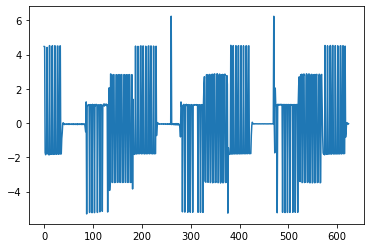

In [15]:
width = 2048
seqs0 = ch0.reshape((-1, width))
seqs1 = ch1.reshape((-1, width))
tans0 = []
tans1 = []
for seq in seqs0:
    fft_out = np.fft.fftshift(np.fft.fft(seq))[width//2]
    tan = np.angle(fft_out)
    tans0.append(tan)

for seq in seqs1:
    fft_out = np.fft.fftshift(np.fft.fft(seq))[width//2]
    tan = np.angle(fft_out)
    tans1.append(tan)

diff = np.asarray(tans0) - np.asarray(tans1)
plt.plot(diff[400:1024])

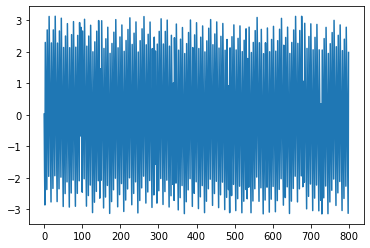

In [188]:
samps0 = ch0.reshape((-1, period))
width = 2048
tans = []
for samps in samps0:
    bands = samps.reshape(-1, width)
    for band in bands:
        fft_out = np.fft.fftshift(np.fft.fft(band))[width//2]
        tan = np.angle(fft_out)
        tans.append(tan)

plt.plot(tans)

8.656756191870953

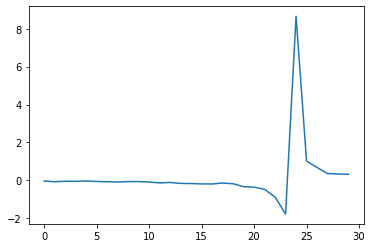

In [179]:
fft_out = np.fft.fft(samps0[6, :2049])
fft_out = np.fft.fftshift(fft_out)
plt.plot(fft_out.real[1000:1030])
# plt.plot(fft_out.imag)
fft_out.real[1024]

In [153]:
fft_out.shape

(2049,)

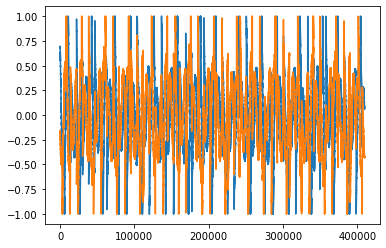

In [99]:
# ampl = np.absolute(ch0)
plt.plot(ch0.real)
plt.plot(ch0.imag)
plt.show()

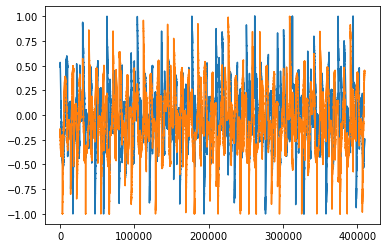

In [100]:
plt.plot(ch1.real)
plt.plot(ch1.imag)
plt.show()

In [213]:
period = 40960
ph0 = np.fromfile("Log/usrp_phase2-0.dat", np.float32)
ph1 = np.fromfile("Log/usrp_phase2-1.dat", np.float32)
ph0.shape[0] , ph1.shape[0]


(5045, 5045)

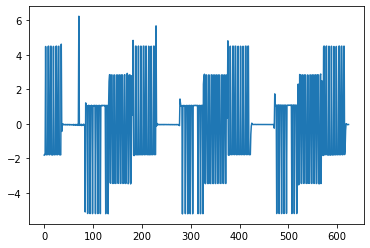

In [218]:
plt.plot((ph0-ph1)[400:1024])

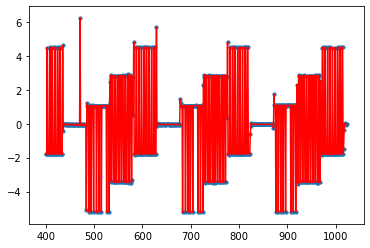

In [244]:
s = 400
e = 1024
diff = ph0 - ph1
plt.plot(np.arange(s, e), diff[s:e], c='r')
plt.scatter(np.arange(s, e), diff[s:e], s=10)
plt.show()

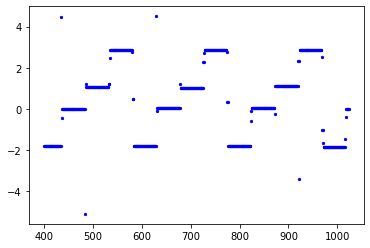

In [241]:
import queue
slots = [0,0]
eps = 0.1
fdiff = []
for d in diff:
    if abs(d - slots[0]) > eps and abs(d - slots[1]) > eps:
        slots[0] = slots[1]
        slots[1] = d
    if abs(slots[0]) > abs(slots[1]):
        fdiff.append(slots[1])
    else:
        fdiff.append(slots[0])

# plt.plot(np.arange(s, e), diff[s:e], c='r')
plt.scatter(np.arange(s, e), fdiff[s:e], s=5, c='b')
# plt.scatter(np.arange(s, e), diff[s:e], s=2)